
# Mangrove Trend based on Seasons in Gujarat

Mangroves are unique coastal ecosystems found in tropical and subtropical regions, including parts of Gujarat, India. They are influenced by various seasonal factors, including temperature, rainfall, tides, and water salinity. Here's a general overview of how seasons can impact mangroves in the Gujarat area:

1. Winter (December to February): Winters in Gujarat are relatively mild. Mangroves may experience lower temperatures, which can slow down their growth. However, the cooler temperatures can also reduce evaporation rates and conserve moisture in the soil, benefitting the mangroves. Some species of mangroves, like Avicennia marina, have adapted to colder conditions and continue to thrive during winter.

2. Pre-monsoon (March to May): This period marks the transition from winter to the monsoon season. Temperatures start to rise, and there is an increase in humidity. Mangroves prepare for the monsoon by storing water and nutrients in their roots, stems, and leaves. This is a crucial time for their growth and reproduction.

3. Monsoon (June to September): The monsoon season brings heavy rainfall to Gujarat. Mangroves benefit from the increased freshwater input, which replenishes the water table and helps maintain soil moisture levels. The excessive rainfall can cause flooding in some areas, which can affect mangroves negatively. However, mangroves are adapted to these conditions and have developed specialized root systems that can tolerate periodic inundation.

4. Post-monsoon (October to November): After the monsoon season, the rainfall gradually decreases, and temperatures start to drop. The water salinity levels increase as freshwater input reduces. Mangroves adjust to these changes, and the reduced rainfall can lead to an increase in water salinity. Some species, like Rhizophora mucronata, are more tolerant of higher salinity levels.

It's important to note that specific trends and conditions can vary from year to year, and the health and growth of mangroves depend on numerous factors beyond just the seasons, such as human activities, pollution, and coastal erosion. For the most accurate and up-to-date information on the current trend of mangroves in the Gujarat area, it is recommended to consult local environmental agencies, research institutes, or conservation organizations working in the region.

In [13]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import datacube
from deafrica_tools.plotting import rgb,display_map
import odc.algo
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog
import matplotlib as mpl

dc = datacube.Datacube(app="04_Plotting")
#22.559247, 69.019186
#22.348563, 69.784109
#22.150281, 69.873373
lat_range = (22.247416, 22.626093)
lon_range = (68.955903, 70.172274)
time_range = '2022-10-27'
#display_map(x=lon_range, y=lat_range)
ds = dc.load(product="s2a_sen2cor_granule",
                 measurements=["red","green","blue", "nir","B11_20m"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:6933',
             resolution=(-30, 30))

print(ds)

<xarray.Dataset>
Dimensions:      (time: 1, y: 1492, x: 3913)
Coordinates:
  * time         (time) datetime64[ns] 2022-10-27T06:03:06.508430
  * y            (y) float64 2.814e+06 2.814e+06 ... 2.769e+06 2.769e+06
  * x            (x) float64 6.653e+06 6.653e+06 ... 6.771e+06 6.771e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    green        (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    blue         (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    nir          (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    B11_20m      (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


In [9]:
split_datasets = dataset.groupby('time')
groups = split_datasets.groups

for group, indices in groups.items():
    split_dataset = dataset.isel(time=indices)
    print(split_dataset)


<xarray.Dataset>
Dimensions:      (y: 1492, x: 3913)
Coordinates:
    time         datetime64[ns] 2022-10-27T06:03:06.508430
  * y            (y) float64 2.814e+06 2.814e+06 ... 2.769e+06 2.769e+06
  * x            (x) float64 6.653e+06 6.653e+06 ... 6.771e+06 6.771e+06
    spatial_ref  int32 6933
Data variables:
    red          (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    green        (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    blue         (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    nir          (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    B11_20m      (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref
<xarray.Dataset>
Dimensions:      (y: 1492, x: 3913)
Coordinates:
    time         datetime64[ns] 2023-02-14T06:03:00.763574
  * y            (y) float64 2.814e+06 2.814e+06 ... 2.769e+06 2.769e+06
  * x          

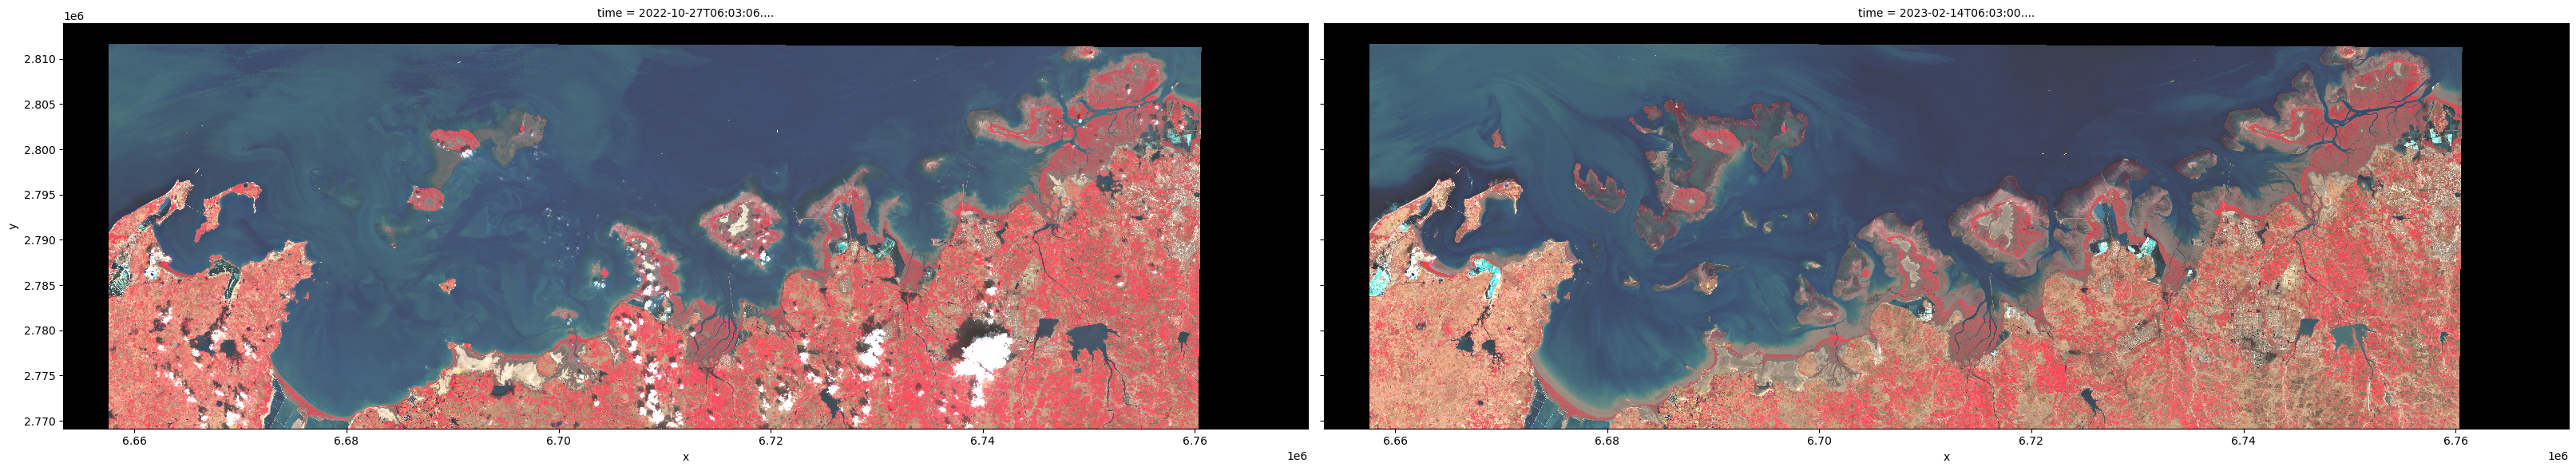

In [2]:
dataset=ds
rgb(ds,bands=['nir','red','green'],index=[0,1])

In [3]:
# convert dataset to float32 datatype so no-data values are set to NaN
dataset =  odc.algo.to_f32(ds)

# Calculate the components that make up the NDVI calculation
band_diff = dataset.nir - dataset.green
band_sum = dataset.B11_20m - dataset.green

# Calculate NDVI and store it as a measurement in the original dataset
mvi = band_diff / band_sum
print(mvi)

<xarray.DataArray (time: 2, y: 1492, x: 3913)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2022-10-27T06:03:06.508430 2023-02-14T...
  * y            (y) float64 2.814e+06 2.814e+06 ... 2.769e+06 2.769e+06
  * x            (x) float64 6.653e+06 6.653e+06 ... 6.771e+06 6.771e+06
    spatial_ref  int32 6933


<Figure size 1600x1600 with 0 Axes>

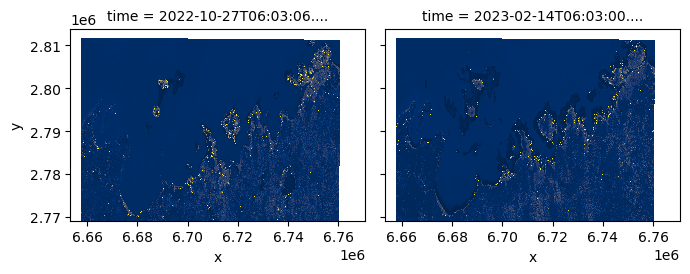

In [4]:
plt.figure(figsize=(16, 16))
mvi.plot(col='time', cmap='cividis', vmin=0 ,vmax=16, add_colorbar=False)
plt.show()

<xarray.Dataset>
Dimensions:      (time: 1, y: 5234, x: 13025)
Coordinates:
  * time         (time) datetime64[ns] 2022-10-27T06:03:06.508430
  * y            (y) float64 2.553e+06 2.553e+06 ... 2.501e+06 2.501e+06
  * x            (x) float64 -7.476e+05 -7.476e+05 ... -6.174e+05 -6.174e+05
    spatial_ref  int32 32644
Data variables:
    red          (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    green        (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    blue         (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    nir          (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    B11_20m      (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           EPSG:32644
    grid_mapping:  spatial_ref
<xarray.Dataset>
Dimensions:      (time: 1, y: 5234, x: 13025)
Coordinates:
  * time         (time) datetime64[ns] 2023-02-14T06:03:00.763574
  * y            (y) float64 2.553e+06 2.55

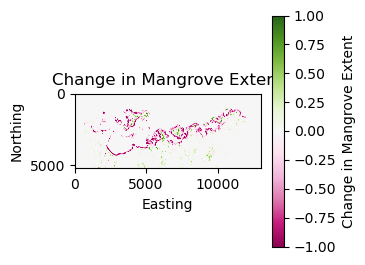

In [14]:
import datacube
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Connect to the datacube
dc = datacube.Datacube(app='mangrove_example')

# Define the query parameters
lat_range = (22.247416, 22.626093)
lon_range = (68.955903, 70.172274)
time_range1 = ('2022-01-15', '2022-12-15')
time_range2 = ('2023-01-15', '2023-02-15')

query = {
    'lat': lat_range,
    'lon': lon_range,
    'time': time_range1,
    'measurements': ['red', 'green', 'blue', 'nir', 'B11_20m'],
    'product': 's2a_sen2cor_granule',
    'output_crs': 'EPSG:32644',
    'resolution': (-10, 10)
}

# Load the data for the first time period
ds1 = dc.load(**query)
print(ds1)


# Compute the MVI for the first time period
mangrove1 = ((ds1.nir - ds1.green) / (ds1.B11_20m - ds1.green+0.5))*(1.5)
# Set threshold for mangrove detection
mangrove_thresh = 0.5

# Create a mangrove mask
mangrove_mask1 = np.where(mangrove1 > mangrove_thresh, 1, 0)

# Load the data for the second time period
query['time'] = time_range2
ds2 = dc.load(**query)

print(ds2)
# Compute the MVI for the second time period
mangrove2 = ((ds2.nir - ds2.green) / (ds2.B11_20m - ds2.green+0.5))*(1.5)
# Create a mangrove mask
mangrove_mask2 = np.where(mangrove2 > mangrove_thresh, 1, 0)

# Compute the change in mangrove extent
mangrove_change = mangrove_mask2 - mangrove_mask1

# Create a colormap
cmap = plt.get_cmap('PiYG')

# Plot the change in mangrove extent
fig, ax = plt.subplots(figsize=(3, 3))
im = ax.imshow(mangrove_change[-1], cmap=cmap, vmin=-1, vmax=1)
ax.set_title('Change in Mangrove Extent')
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Change in Mangrove Extent')

# Show the plot
plt.show()

#Purple indicates negative value. Decreasing mangroves.